<a href="https://colab.research.google.com/github/Genious-Bajracharya/Python-Projects/blob/main/Regression_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Descriptio**n

This dataset states states the price of old motercycles that are being sold again with its features

this dataset can be found on:https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho?select=car+data.csv

**Features of dataset**

1. **Name**:  This column states the name of the bike with its brand and model
2. **selling_price**:  This column states the price in which he is selling the Motorcycle
3. **year**:  This column states the year in which the bike was bought. Can affect price due to time.
4. **seller_type**: This column states the type of seller in this dataset there appears to be two types of seller individual and dealer.
5. **owner**: This column tells us the ownership number of the motorcycle. As n how many owners has owned it before.
6. **km_driven**: this column states total travel distance of the motorbike in kilometeres
7. **ex_showroom_price**: this column states the showroom price of the model of motercycle


In [ ]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import metrics

In [ ]:
from google.colab import files
uploaded= files.upload()

Saving BIKE DETAILS.csv to BIKE DETAILS.csv


In [ ]:
#importing data in pandas
import io
data = pd.read_csv(io.BytesIO(uploaded['BIKE DETAILS.csv']))
df=data
data.head()


,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [ ]:
data.shape


(1061, 7)

As we can see our dataset has 1061 rows and 7 columns

In [ ]:
data.info()
#All information regarding table

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.1+ KB


We have 3 int type datas 1 float type data and, 3 object type datas which we might have to change

In [ ]:
#Checking for null data values
df.isnull().sum()

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

ex_showroom_price column seems to have too many null values

In [ ]:
df[df['ex_showroom_price'].isnull()]

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
7,Royal Enfield Bullet 350 [2007-2011],180000,2008,Individual,2nd owner,39000,NaN
8,Hero Honda CBZ extreme,30000,2010,Individual,1st owner,32000,NaN
...,...,...,...,...,...,...,...
951,Royal Enfield Electra 5 S,90000,2012,Individual,1st owner,40000,NaN
952,Hero Honda Hunk,20000,2010,Individual,1st owner,17000,NaN
957,Bajaj Pulsar 220 DTS-i,60000,2014,Individual,1st owner,16000,NaN
958,Hero Honda CBZ extreme,40000,2009,Individual,1st owner,50000,NaN


As ex_showroom_price has many null dsdata values we will drop it to clean this data

In [ ]:
data = data.drop('ex_showroom_price', axis = 1)
df=data

In [ ]:
#Checking for null values again
df.isnull().sum()

name             0
selling_price    0
year             0
seller_type      0
owner            0
km_driven        0
dtype: int64

As we can see there are no more null values remaining hence we can proceed further

In [ ]:
df['name'].value_counts().head()

Bajaj Pulsar 150             41
Royal Enfield Classic 350    27
Honda Activa [2000-2015]     23
Honda CB Hornet 160R         22
Bajaj Pulsar 180             20
Name: name, dtype: int64

In [ ]:
data['owner'].value_counts()

1st owner    924
2nd owner    123
3rd owner     11
4th owner      3
Name: owner, dtype: int64

There are four categories in owner

In [ ]:
data['seller_type'].value_counts()

Individual    1055
Dealer           6
Name: seller_type, dtype: int64

There are two categories in seller type individual seller and a dealer

Text(0.5, 0, 'Count')

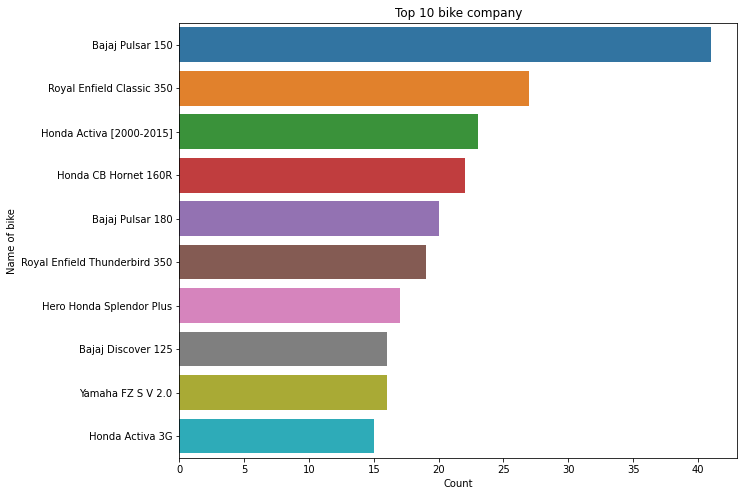

In [ ]:
top_bike = df['name'].value_counts().head(10)
plt.figure(figsize=(10, 8))
sns.barplot(x = top_bike, y = top_bike.index)
plt.ylabel('Name of bike')
plt.title('Top 10 bike company')
plt.xlabel('Count')

In the above figure we can see the top 10 bikes available in the dataset with bajaj pulsar being the most popular. These are the bikes with top 10 highest count in the whole dataset. In the X axis we can see the count or no.of bikes and in th Y axis we can see the name or model of the bike.

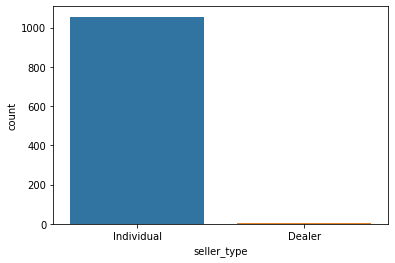

In [ ]:
sns.countplot(x=df['seller_type'], data=data)

In the above figure we can see the diferent types of sellers. As we can see we have two types od sellers. One being individual and the other being through a dealer.
The number of individual seller is way higher then that of dealer ad represented by the graph. Majority of the seller are Individual. In the X axis we can see the seller_type (type of seller) and in the Y axis we can see its count.

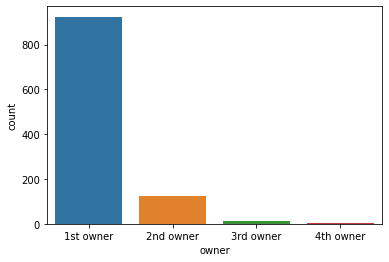

In [ ]:
sns.countplot(x=df['owner'], data=data)

In the above figure we can see the different types of owners. As we can see there are 4 types of owners. 1st, 2nd, 3rd, and 4th owners respectively. Here, in the X axis we can see the type of owners and in the Y axis we can see the count of the owner.
The no. of owners has a gradual decliine as the ownership increase. There are more amount of 1st owners compared to 2nd,3rd, and 4th owners. So, no.of 1st>2nd>3rd>4th. we can assume the cause of decline in count of owners could be difficulty to sell bikes as more people have used it.

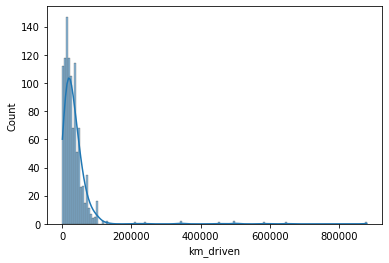

In [ ]:
sns.histplot(df['km_driven'],kde = True)

Majority of the moterbikes have their total distance between 0-200000 km. There are a few exception though that go beyonf those marks


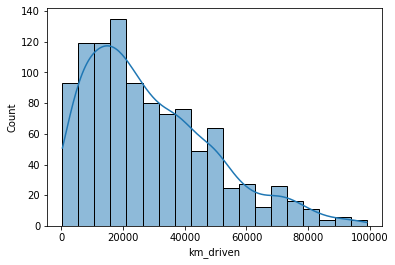

In [ ]:
#as there seems to be a huge outlier we will now deal with it
df = df[df['km_driven'] < 100000]
sns.histplot(df['km_driven'], kde = True)

It is more balnced now


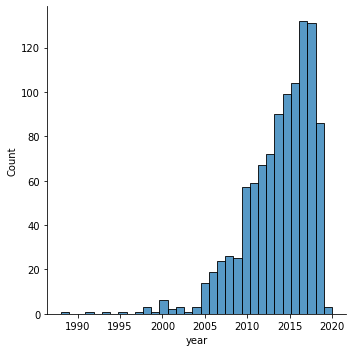

In [ ]:
sns.displot(df['year'])

Here we can teh see the year the bike was bought. Here we can analyse that most bikes we bought between 2010-2020. Before 2005 the no.of bikes bought is very less, its only after 2005 it starts to increse. Reaching the highest peak between 2010 and 2015.

In [ ]:
bike_bought = df['year'].value_counts().head(10)


Here we can see the exact no.of bikes bought in top 10 years.The highest being 2017 with 133 moterbikes bought.

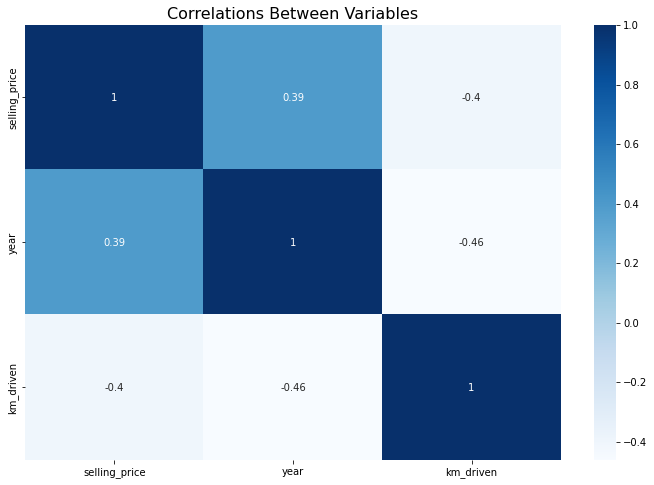

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="Blues")
plt.title("Correlations Between Variables", size=16)
plt.show()

There seems to be moderate correlation among these variables

In [ ]:

df.head()

,name,selling_price,year,seller_type,owner,km_driven
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350
1,Honda Dio,45000,2017,Individual,1st owner,5650
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000


In [ ]:
#Converting categorial data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.owner=le.fit_transform(df.owner)
df.seller_type=le.fit_transform(df.seller_type)
df.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,name,selling_price,year,seller_type,owner,km_driven
0,Royal Enfield Classic 350,175000,2019,1,0,350
1,Honda Dio,45000,2017,1,0,5650
2,Royal Enfield Classic Gunmetal Grey,150000,2018,1,0,12000
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,1,0,23000
4,Yamaha SZ [2013-2014],20000,2011,1,1,21000


In [ ]:
df = df.drop('name', axis = 1)#name is not of any use for us hence we will drop it
df["old"] = 2022-df["year"]#instead of using year we are going to use how old the bikes are for better understanding
df.drop(["year"],axis=1,inplace=True)

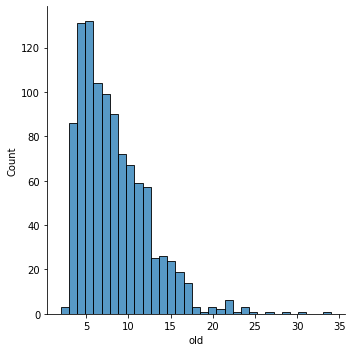

In [ ]:
sns.displot(df['old'])#data we will be using inplace of year

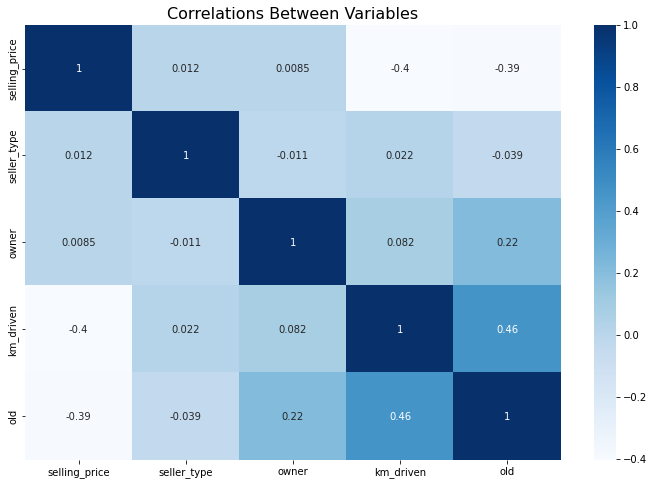

In [ ]:
#checking for correlation again
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="Blues")
plt.title("Correlations Between Variables", size=16)
plt.show()

Correlation among variables are mostly low now


In [ ]:
df.shape# new shape oif the data we will be working on

(1032, 5)

In [ ]:
#Separating data
# i.e separating selling price form rest of the columns
X=df.iloc[: , 1:6]
y=df.iloc[: ,0:1 ]

In [ ]:
#preporcessing data
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
y = preprocessing.StandardScaler().fit(y).transform(y)
print(X[:5])
print(y[:5])

[[ 0.06977499 -0.35837663 -1.39139347 -1.18263911]
 [ 0.06977499 -0.35837663 -1.13251041 -0.71131895]
 [ 0.06977499 -0.35837663 -0.82233919 -0.94697903]
 [ 0.06977499 -0.35837663 -0.28503472 -0.23999878]
 [ 0.06977499  2.19227636 -0.38272644  0.70264154]]
[[ 2.02059825]
 [-0.27221113]
 [ 1.57967337]
 [ 0.08052878]
 [-0.71313601]]


As we can see the dependent variable is seprated from rest of the variables

# Linear Regression
The most fundamental and widely used kind of predictive analysis is linear regression.The simplest version of the regression equation with one dependent and one independent variable is y = c + b*x, where y represents the estimated dependent variable score, c represents the constant, b represents the regression coefficient, and x represents the independent variable score.

# RMSE
The root mean square error (RMSE) is the residuals' standard deviation (prediction errors).Root mean square error is commonly used in climatology, forecasting, and regression analysis to verify experimental results.

## R2
R squared is a measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.


In [ ]:
from sklearn.linear_model import LinearRegression
lin=LinearRegression()
lin.fit(X,y)

LinearRegression()

In [ ]:
print(lin.intercept_)
print(lin.coef_)

[-4.22637435e-18]
[[ 0.00773692  0.09343001 -0.28032677 -0.28334543]]


In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, accuracy_score


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
lin=LinearRegression().fit(X_train,y_train)

In [ ]:
lin_pred_test=lin.predict(X_test)
lin_pred_train=lin.predict(X_train)

print("Training RMSE:",np.sqrt(mean_squared_error(y_train,lin_pred_train)))
print("Training R2: ",r2_score(y_train,lin_pred_train)*100)
print("Training MSE: ",(mean_squared_error(y_train,lin_pred_train)))
print("\n")
print("Test RMSE:",np.sqrt(mean_squared_error(y_test,lin_pred_test)))
print("Test R2: ",r2_score(y_test,lin_pred_test)*100)
print("Test MSE: ",(mean_squared_error(y_test,lin_pred_test)))




Training RMSE: 0.938673126391783
Training R2:  22.182860454029306
Training MSE:  0.8811072382101242


Test RMSE: 0.5989957513296913
Test R2:  23.529582462822983
Test MSE:  0.3587959101110214


Error is reduced in the testing model